**Google Colab code for Weather Data Analysis and Prediction**

Install necessary libraries

In [1]:
!pip install pandas matplotlib seaborn scikit-learn

Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


Visualization settings

In [5]:
sns.set(style="whitegrid")
plt.rcParams['figure.figsize'] = (14, 7)
plt.rcParams['font.size'] = 12

Load data

In [7]:
file_path = '/content/drive/MyDrive/weather.csv'
df = pd.read_csv(file_path)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60585 entries, 0 to 60584
Data columns (total 9 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   location_id                60585 non-null  int64  
 1   time                       60585 non-null  object 
 2   weather_code (wmo code)    60585 non-null  int64  
 3   temperature_2m_mean (°C)   60585 non-null  float64
 4   temperature_2m_max (°C)    60585 non-null  float64
 5   temperature_2m_min (°C)    60585 non-null  float64
 6   rain_sum (mm)              60585 non-null  float64
 7   snowfall_sum (cm)          60585 non-null  float64
 8   wind_speed_10m_max (km/h)  60585 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 4.2+ MB


,location_id,time,weather_code (wmo code),temperature_2m_mean (°C),temperature_2m_max (°C),temperature_2m_min (°C),rain_sum (mm),snowfall_sum (cm),wind_speed_10m_max (km/h)
0,0,1/1/1970,73,-0.9,1.6,-7.5,4.2,0.63,15.1
1,0,1/2/1970,0,-3.7,1.8,-9.2,0.0,0.00,7.7
2,0,1/3/1970,2,-2.0,2.1,-5.8,0.0,0.00,8.3
3,0,1/4/1970,3,0.3,4.2,-2.7,0.0,0.00,4.5
4,0,1/5/1970,3,2.3,5.7,-1.8,0.0,0.00,7.6


In [8]:
df.describe()

,location_id,weather_code (wmo code),temperature_2m_mean (°C),temperature_2m_max (°C),temperature_2m_min (°C),rain_sum (mm),snowfall_sum (cm),wind_speed_10m_max (km/h)
count,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000,60585.000000
mean,1.000000,23.780672,14.654632,19.709923,9.884254,1.982010,0.087270,13.670981
std,0.816503,26.758138,8.536200,9.125116,8.200187,5.499512,0.868571,4.801626
min,0.000000,0.000000,-14.900000,-10.800000,-19.200000,0.000000,0.000000,2.500000
25%,0.000000,2.000000,8.000000,12.800000,3.600000,0.000000,0.000000,10.400000
50%,1.000000,3.000000,15.300000,20.400000,10.400000,0.000000,0.000000,12.600000
75%,2.000000,51.000000,21.900000,27.100000,16.800000,1.000000,0.000000,15.900000
max,2.000000,75.000000,33.800000,42.400000,27.200000,107.000000,44.240000,47.600000


Data cleaning

In [9]:
df["time"] = pd.to_datetime(df["time"])

df = df.dropna(subset=['temperature_2m_mean (°C)', 'rain_sum (mm)'])

df = df[(df['temperature_2m_mean (°C)'] > -50) & (df['temperature_2m_mean (°C)'] < 60)]
df = df[df['rain_sum (mm)'] >= 0]

df['year'] = df['time'].dt.year
df['month'] = df['time'].dt.month

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60585 entries, 0 to 60584
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   location_id                60585 non-null  int64         
 1   time                       60585 non-null  datetime64[ns]
 2   weather_code (wmo code)    60585 non-null  int64         
 3   temperature_2m_mean (°C)   60585 non-null  float64       
 4   temperature_2m_max (°C)    60585 non-null  float64       
 5   temperature_2m_min (°C)    60585 non-null  float64       
 6   rain_sum (mm)              60585 non-null  float64       
 7   snowfall_sum (cm)          60585 non-null  float64       
 8   wind_speed_10m_max (km/h)  60585 non-null  float64       
 9   year                       60585 non-null  int32         
 10  month                      60585 non-null  int32         
dtypes: datetime64[ns](1), float64(6), int32(2), int64(2)
memory usage: 

,location_id,time,weather_code (wmo code),temperature_2m_mean (°C),temperature_2m_max (°C),temperature_2m_min (°C),rain_sum (mm),snowfall_sum (cm),wind_speed_10m_max (km/h),year,month
0,0,1970-01-01,73,-0.9,1.6,-7.5,4.2,0.63,15.1,1970,1
1,0,1970-01-02,0,-3.7,1.8,-9.2,0.0,0.00,7.7,1970,1
2,0,1970-01-03,2,-2.0,2.1,-5.8,0.0,0.00,8.3,1970,1
3,0,1970-01-04,3,0.3,4.2,-2.7,0.0,0.00,4.5,1970,1
4,0,1970-01-05,3,2.3,5.7,-1.8,0.0,0.00,7.6,1970,1


In [10]:
df[df.select_dtypes(include=['int']).columns] = df.select_dtypes(include =['int']).astype("uint16")
df[df.select_dtypes(include=['float']).columns] = df.select_dtypes(include =['float']).astype("float32")

print(df.info())
print(df.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60585 entries, 0 to 60584
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype         
---  ------                     --------------  -----         
 0   location_id                60585 non-null  uint16        
 1   time                       60585 non-null  datetime64[ns]
 2   weather_code (wmo code)    60585 non-null  uint16        
 3   temperature_2m_mean (°C)   60585 non-null  float32       
 4   temperature_2m_max (°C)    60585 non-null  float32       
 5   temperature_2m_min (°C)    60585 non-null  float32       
 6   rain_sum (mm)              60585 non-null  float32       
 7   snowfall_sum (cm)          60585 non-null  float32       
 8   wind_speed_10m_max (km/h)  60585 non-null  float32       
 9   year                       60585 non-null  uint16        
 10  month                      60585 non-null  uint16        
dtypes: datetime64[ns](1), float32(6), uint16(4)
memory usage: 2.3 MB
No

Drop columns



In [11]:
columns_to_drop = ['weather_code (wmo code)', 'temperature_2m_max (°C)', 'temperature_2m_min (°C)', 'wind_speed_10m_max (km/h)', 'time']

df.drop(columns=columns_to_drop, inplace=True)

df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60585 entries, 0 to 60584
Data columns (total 6 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   location_id               60585 non-null  uint16 
 1   temperature_2m_mean (°C)  60585 non-null  float32
 2   rain_sum (mm)             60585 non-null  float32
 3   snowfall_sum (cm)         60585 non-null  float32
 4   year                      60585 non-null  uint16 
 5   month                     60585 non-null  uint16 
dtypes: float32(3), uint16(3)
memory usage: 1.0 MB


,location_id,temperature_2m_mean (°C),rain_sum (mm),snowfall_sum (cm),year,month
0,0,-0.9,4.2,0.63,1970,1
1,0,-3.7,0.0,0.00,1970,1
2,0,-2.0,0.0,0.00,1970,1
3,0,0.3,0.0,0.00,1970,1
4,0,2.3,0.0,0.00,1970,1


Select three cities (update IDs based on your dataset)

In [12]:
print(df['location_id'].unique())
selected_cities = [0, 1, 2]
df = df[df['location_id'].isin(selected_cities)]

df['location_id'].info()

[0 1 2]
<class 'pandas.core.series.Series'>
RangeIndex: 60585 entries, 0 to 60584
Series name: location_id
Non-Null Count  Dtype 
--------------  ----- 
60585 non-null  uint16
dtypes: uint16(1)
memory usage: 118.5 KB


Data summary

In [13]:
summary = df.groupby(['location_id', 'month']).agg(
    avg_temp=('temperature_2m_mean (°C)', 'mean'),
    median_temp=('temperature_2m_mean (°C)', 'median'),
    total_precipitation=('rain_sum (mm)', 'sum'),
    days_count=('temperature_2m_mean (°C)', 'count')
).reset_index()

summary[summary.select_dtypes(include=['int']).columns] = summary.select_dtypes(include=['int']).astype('uint16')

summary.info()
summary.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   location_id          36 non-null     uint16 
 1   month                36 non-null     uint16 
 2   avg_temp             36 non-null     float32
 3   median_temp          36 non-null     float32
 4   total_precipitation  36 non-null     float32
 5   days_count           36 non-null     uint16 
dtypes: float32(3), uint16(3)
memory usage: 780.0 bytes


,location_id,month,avg_temp,median_temp,total_precipitation,days_count
0,0,1,-0.811002,-0.35,854.400024,1736
1,0,2,0.761947,1.00,1306.400024,1582
2,0,3,5.808640,6.10,2503.699951,1736
3,0,4,12.708103,13.00,2328.100098,1666
4,0,5,17.482698,17.50,1320.900024,1705


Visualizations

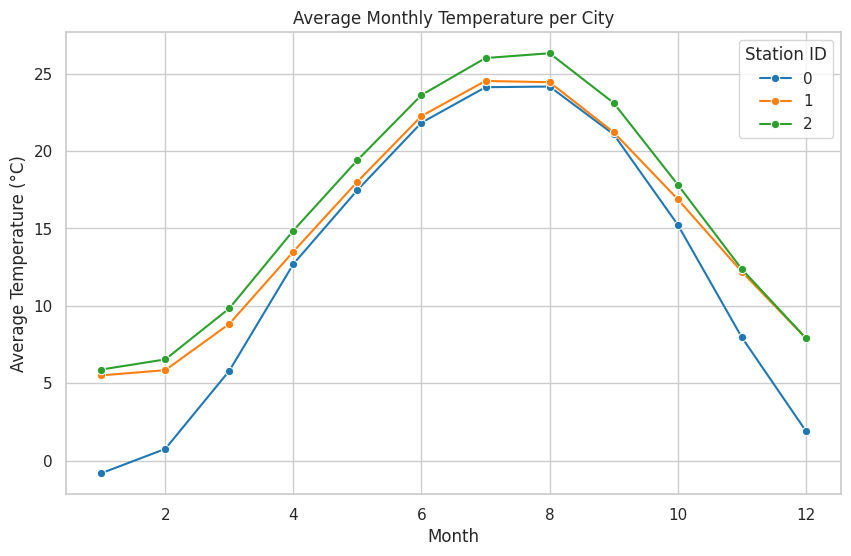

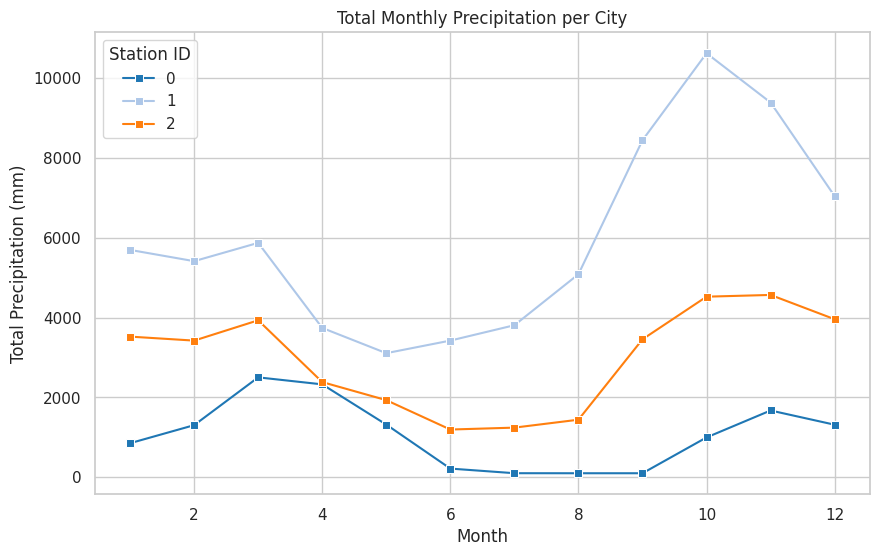

The column 'precipitation_type' does not exist in the DataFrame.


<ipython-input-14-9109591165a5>:42: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend(title='Station ID')


<Figure size 1400x700 with 0 Axes>

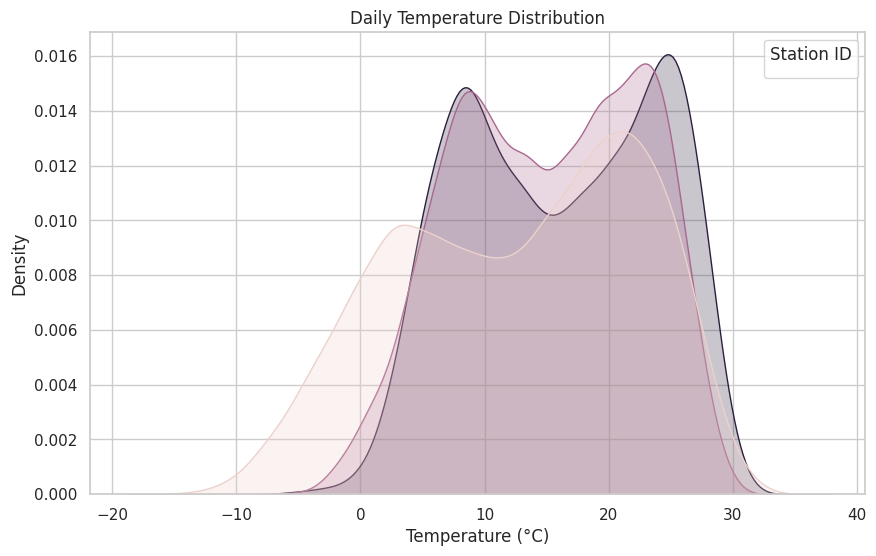

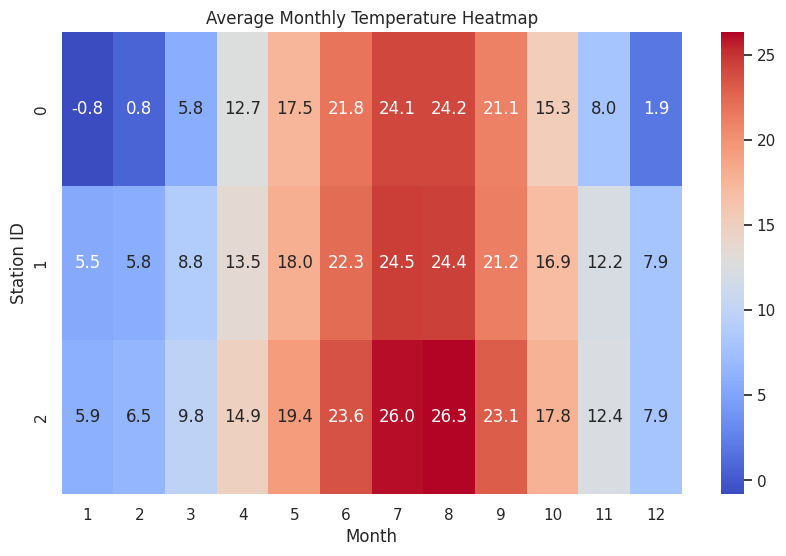

In [14]:
# 1.Average Monthly Temperature per City
plt.figure(figsize=(10, 6))
sns.lineplot(data=summary, x='month', y='avg_temp', hue='location_id', marker='o', palette='tab10')
plt.title('Average Monthly Temperature per City')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.legend(title='Station ID')
plt.grid(True)
plt.show()

# 2.Total Monthly Precipitation per City
plt.figure(figsize=(10, 6))
sns.lineplot(data=summary, x='month', y='total_precipitation', hue='location_id', marker='s', palette='tab20')
plt.title('Total Monthly Precipitation per City')
plt.xlabel('Month')
plt.ylabel('Total Precipitation (mm)')
plt.legend(title='Station ID')
plt.grid(True)
plt.show()

# 3.Monthly Precipitation Type Distribution (Stacked Bar Chart)
plt.figure(figsize=(14, 7))
if 'precipitation_type' in df.columns:
    precip_counts = df.groupby(['month', 'precipitation_type']).size().unstack().fillna(0)
    precip_counts.plot(kind='bar', stacked=True, colormap='Paired', figsize=(14, 7))
    plt.title('Precipitation Type Distribution by Month')
    plt.xlabel('Month')
    plt.ylabel('Number of Days')
    plt.legend(title='Precipitation Type')
    plt.xticks(rotation=0)
    plt.grid(axis='y')
    plt.show()
else:
    print("The column 'precipitation_type' does not exist in the DataFrame.")

# 4.Temperature Distribution per City (KDE Plot)
plt.figure(figsize=(10, 6))
sns.kdeplot(data=df, x='temperature_2m_mean (°C)', hue='location_id', fill=True)
plt.title('Daily Temperature Distribution')
plt.xlabel('Temperature (°C)')
plt.ylabel('Density')
plt.legend(title='Station ID')
plt.grid(True)
plt.show()

# 5.Heatmap of Average Monthly Temperature per City
heatmap_data = summary.groupby(['location_id', 'month'])['avg_temp'].mean().unstack()

plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_data, annot=True, fmt=".1f", cmap='coolwarm')
plt.title('Average Monthly Temperature Heatmap')
plt.xlabel('Month')
plt.ylabel('Station ID')
plt.show()

Anomaly Detection


 Temperature Anomalies Detected: 29 days


,location_id,year,month,temperature_2m_mean (°C)
2581,0,1977,1,-11.0
1097,0,1973,1,-11.0
4431,0,1982,2,-11.1
13889,0,2008,1,-11.2
754,0,1972,1,-11.2
4774,0,1983,1,-11.3
3683,0,1980,2,-11.5
763,0,1972,2,-11.5
3682,0,1980,1,-11.5
13898,0,2008,1,-11.6


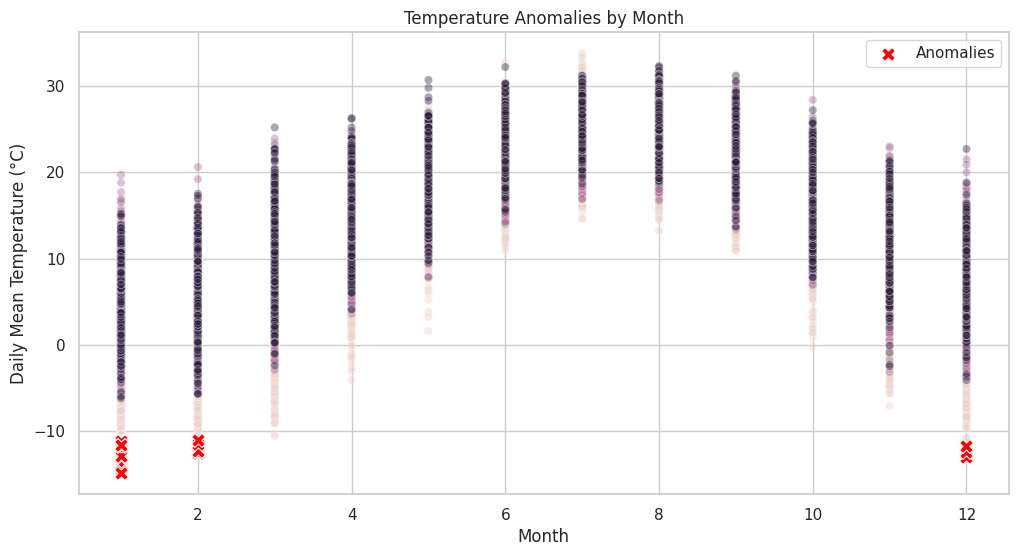

In [15]:
# Calculate mean and standard deviation of daily mean temperatures
mean_temp = df['temperature_2m_mean (°C)'].mean()
std_temp = df['temperature_2m_mean (°C)'].std()

#Identify anomalies: temperatures more than ±3 standard deviations from the mean
anomalies = df[
    (df['temperature_2m_mean (°C)'] > mean_temp + 3 * std_temp) |
    (df['temperature_2m_mean (°C)'] < mean_temp - 3 * std_temp)
]

#Output the number of anomalies found
print(f"\n Temperature Anomalies Detected: {len(anomalies)} days")

#Display basic information about detected anomalies
display(anomalies[['location_id', 'year', 'month', 'temperature_2m_mean (°C)']].sort_values(by='temperature_2m_mean (°C)', ascending=False))

#Visualize the anomalies
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='month', y='temperature_2m_mean (°C)', hue='location_id', alpha=0.4, legend=False)
sns.scatterplot(data=anomalies, x='month', y='temperature_2m_mean (°C)', color='red', label='Anomalies', marker='X', s=100)
plt.title('Temperature Anomalies by Month')
plt.xlabel('Month')
plt.ylabel('Daily Mean Temperature (°C)')
plt.legend()
plt.grid(True)
plt.show()

Temperature Prediction with Linear Regression


 Temperature Prediction Mean Squared Error (MSE): 54.04


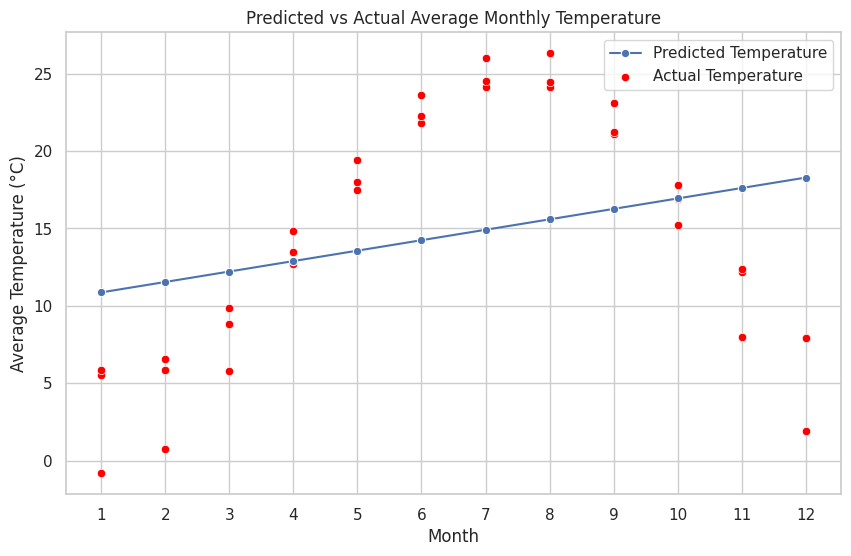

In [16]:
# Prepare the data for modeling
temp_data = summary[['month', 'avg_temp']]
X = temp_data[['month']]  # Feature: month (1–12)
y = temp_data['avg_temp']  # Target: average temperature

# Split data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train a Linear Regression model
model_temp = LinearRegression()
model_temp.fit(X_train, y_train)

# Predict temperatures on the test set
y_pred = model_temp.predict(X_test)

# Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"\n Temperature Prediction Mean Squared Error (MSE): {mse:.2f}")

# Predict temperature for all 12 months (1 to 12)
future_months = pd.DataFrame({'month': range(1, 13)})
future_predictions = model_temp.predict(future_months)

# Visualize actual vs predicted monthly temperatures
plt.figure(figsize=(10, 6))
sns.lineplot(x=future_months['month'], y=future_predictions, marker='o', label='Predicted Temperature')
sns.scatterplot(x=temp_data['month'], y=temp_data['avg_temp'], color='red', label='Actual Temperature')
plt.title('Predicted vs Actual Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(range(1, 13))
plt.legend()
plt.grid(True)
plt.show()

Predicting Monthly Average Temperature with Linear Regression


 Mean Squared Error (MSE) of Temperature Prediction: 54.04


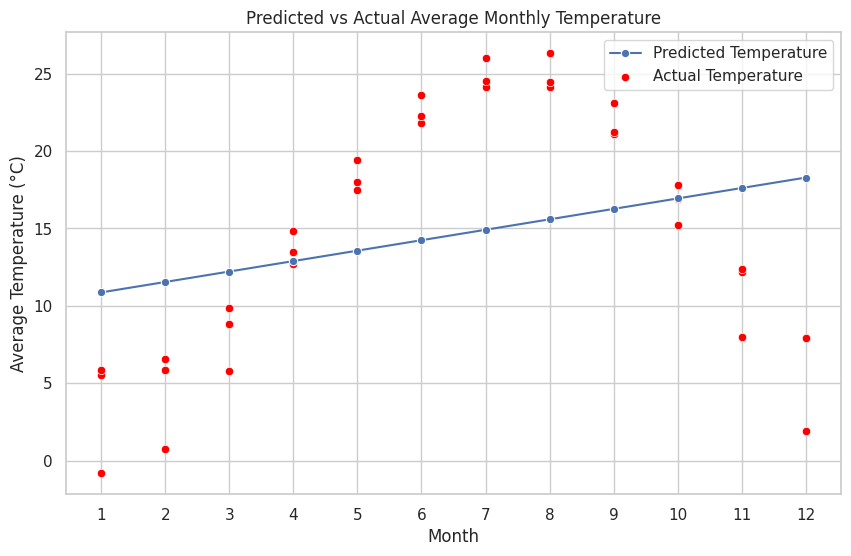

In [17]:
# Step 1: Prepare the data
temp_data = summary[['month', 'avg_temp']]
X = temp_data[['month']]
y = temp_data['avg_temp']

# Step 2: Split the dataset into training and test sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Train a Linear Regression model
model_temp = LinearRegression()
model_temp.fit(X_train, y_train)

# Step 4: Make predictions on the test data
y_pred = model_temp.predict(X_test)

# Step 5: Evaluate the model using Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"\n Mean Squared Error (MSE) of Temperature Prediction: {mse:.2f}")

# Step 6: Predict temperature for all 12 months
future_months = pd.DataFrame({'month': range(1, 13)})
future_predictions = model_temp.predict(future_months)

# Step 7: Plot actual vs. predicted average temperatures
plt.figure(figsize=(10, 6))
sns.lineplot(x=future_months['month'], y=future_predictions, marker='o', label='Predicted Temperature')
sns.scatterplot(x=temp_data['month'], y=temp_data['avg_temp'], color='red', label='Actual Temperature')
plt.title('Predicted vs Actual Average Monthly Temperature')
plt.xlabel('Month')
plt.ylabel('Average Temperature (°C)')
plt.xticks(range(1, 13))
plt.grid(True)
plt.legend()
plt.show()